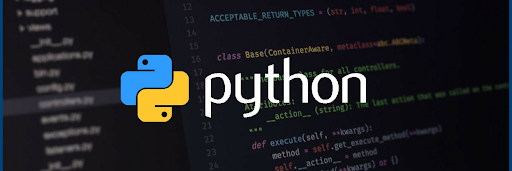

In [ ]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
HERE = Path.cwd(

In [ ]:
pip install playsound

In [14]:
from playsound import playsound
playsound('Unravel (Soft Version) - Tokyo Ghoul (Opening).mp3')

# Student Administration

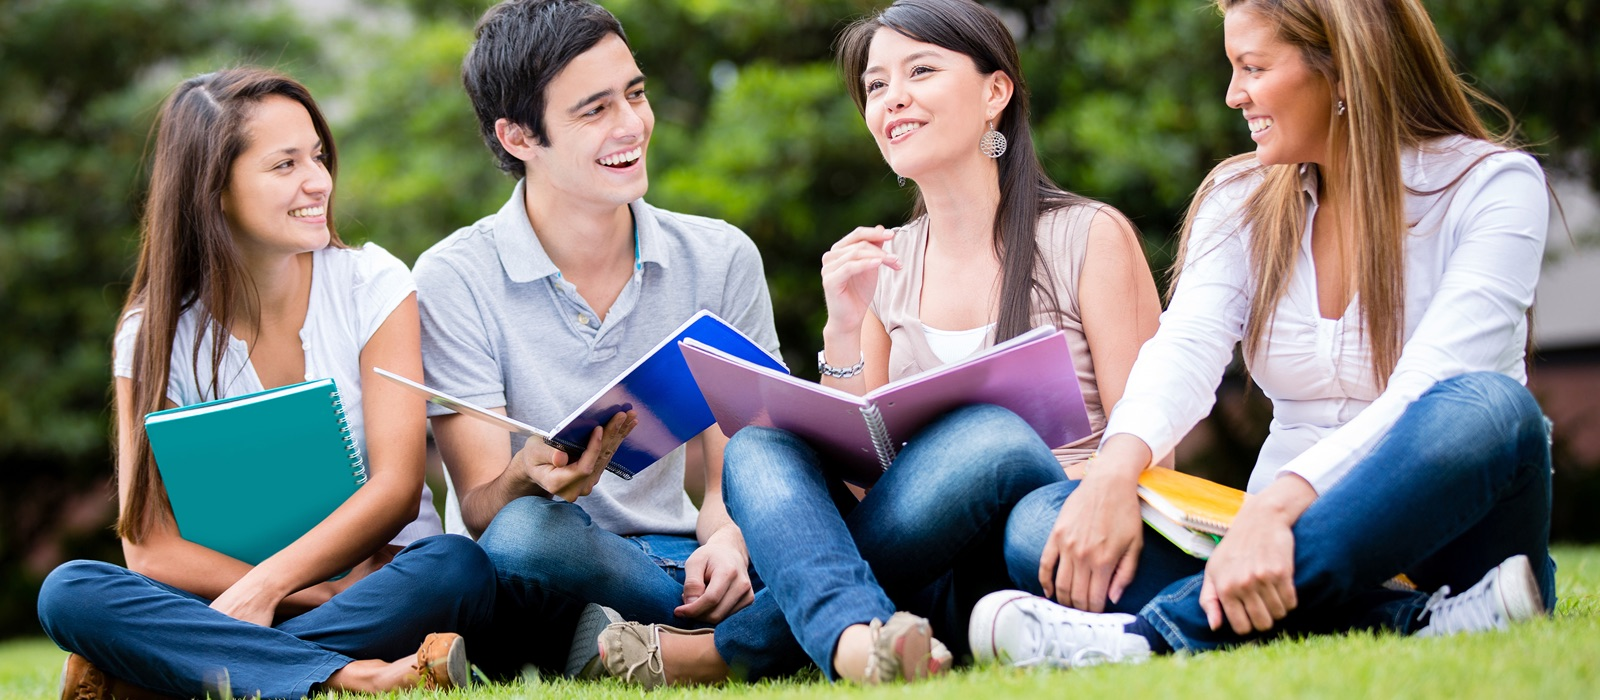

In [15]:
roster = pd.read_csv(
    HERE / "roster.csv",
    converters={"NetID": str.lower, "Email Address": str.lower},
    usecols=["Section", "Email Address", "NetID"],
    index_col="NetID",
)
roster

Email Address  Section
NetID                                       
wxb12345  woody.barrera_jr@univ.edu        1
mxl12345   malaika.lambert@univ.edu        2
txj12345       traci.joyce@univ.edu        1
jgf12345   john.g.2.flower@univ.edu        3
smj00936     stacy.johnson@univ.edu        2
...                             ...      ...
pmj37756      paul.johnson@univ.edu        3
dsl24347      danielle.lee@univ.edu        3
nxe44872    nicole.edwards@univ.edu        3
bxr62103      bailey.reyes@univ.edu        2
jxw53347       joyce.walls@univ.edu        1

[150 rows x 2 columns]

In [16]:
hw_exam_grades = pd.read_csv(
    HERE / "hw_exam_grades.csv",
    converters={"SID": str.lower},
    usecols=lambda x: "Submission" not in x,
    index_col="SID",
)
hw_exam_grades

First Name   Last Name  Homework 1  Homework 1 - Max Points  \
SID                                                                    
axl60952      Aaron      Lester        68.0                       80   
amc28428       Adam      Cooper        80.0                       80   
axc64717       Alec       Curry        69.0                       80   
akr14831  Alexander   Rodriguez        50.0                       80   
axd11293      Amber     Daniels        54.0                       80   
...             ...         ...         ...                      ...   
txw75701     Travis  Washington        64.0                       80   
tbr17292       Troy     Raymond        50.0                       80   
vkb66346   Victoria        Boyd        58.0                       80   
wad63934    William      Daniel        48.0                       80   
wxb12345      Woody     Barrera        55.0                       80   

          Homework 2  Homework 2 - Max Points  Homework 3  \
SID                                                         
axl60952          74                       80          77   
amc28428          78                       80          78   
axc64717          76                       80          66   
akr14831          54                       80          74   
axd11293          57                       80          77   
...              ...                      ...         ...   
txw75701          67                       80          56   
tbr17292          59                       80          79   
vkb66346          61                       80          75   
wad63934          60                       80          72   
wxb12345          62                       80          73   

          Homework 3 - Max Points  Homework 4  Homework 4 - Max Points  ...  \
SID                                                                     ...   
axl60952                       80          89                      100  ...   
amc28428                       80          87                      100  ...   
axc64717                       80          87                      100  ...   
akr14831                       80          75                      100  ...   
axd11293                       80          95                      100  ...   
...                           ...         ...                      ...  ...   
txw75701                       80          92                      100  ...   
tbr17292                       80          98                      100  ...   
vkb66346                       80          99                      100  ...   
wad63934                       80          76                      100  ...   
wxb12345                       80          83                      100  ...   

          Homework 9 - Max Points  Homework 10  Homework 10 - Max Points  \
SID                                                                        
axl60952                       60           41                        60   
amc28428                       60           53                        60   
axc64717                       60           42                        60   
akr14831                       60           47                        60   
axd11293                       60           59                        60   
...                           ...          ...                       ...   
txw75701                       60           52                        60   
tbr17292                       60           49                        60   
vkb66346                       60           50                        60   
wad63934                       60           36                        60   
wxb12345                       60           46                        60   

          Exam 1  Exam 1 - Max Points  Exam 2  Exam 2 - Max Points  Exam 3  \
SID                                                                          
axl60952      79                  100      63                  100      68   
amc28428      65           

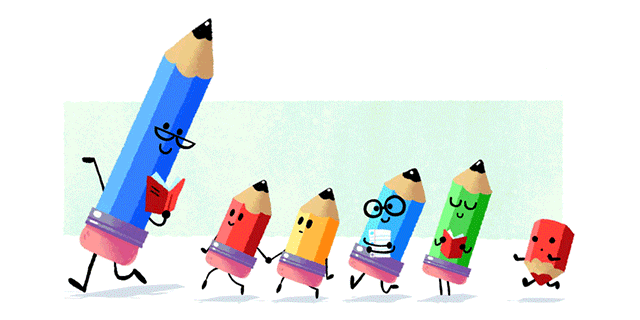

In [17]:
quiz_grades = pd.DataFrame()
for file_path in HERE.glob("quiz_*_grades.csv"):
    quiz_name = " ".join(file_path.stem.title().split("_")[:2])
    quiz = pd.read_csv(
        file_path,
        converters={"Email": str.lower},
        index_col=["Email"],
        usecols=["Email", "Grade"],
    ).rename(columns={"Grade": quiz_name})
    quiz_grades = pd.concat([quiz_grades, quiz], axis=1)
quiz_grades

Quiz 1  Quiz 2  Quiz 3  Quiz 4  Quiz 5
richard.bennett@univ.edu      10       6       9       8      10
timothy.parker@univ.edu        9      14      13      14      10
carol.reyes@univ.edu           5      15       8      14       6
brooke.powers@univ.edu         6      10      17      10       8
michael.taylor@univ.edu        5      15      13      12       5
...                          ...     ...     ...     ...     ...
jeffrey.perez@univ.edu         4       7      12      12       9
angela.dunlap@univ.edu         6      11      11      11       6
richard.elliott@univ.edu       6      13      17      11      12
donna.nguyen@univ.edu          7      12      14       9       4
timothy.ramirez@univ.edu       4       8      13       6       4

[150 rows x 5 columns]

In [18]:
final_data = pd.merge(
    roster, hw_exam_grades, left_index=True, right_index=True,
)
final_data

Email Address  Section First Name Last Name  Homework 1  \
wxb12345  woody.barrera_jr@univ.edu        1      Woody   Barrera        55.0   
mxl12345   malaika.lambert@univ.edu        2    Malaika   Lambert        63.0   
txj12345       traci.joyce@univ.edu        1      Traci     Joyce         NaN   
jgf12345   john.g.2.flower@univ.edu        3      Gregg    Flower        69.0   
smj00936     stacy.johnson@univ.edu        2      Stacy   Johnson        74.0   
...                             ...      ...        ...       ...         ...   
pmj37756      paul.johnson@univ.edu        3       Paul   Johnson        73.0   
dsl24347      danielle.lee@univ.edu        3   Danielle       Lee        69.0   
nxe44872    nicole.edwards@univ.edu        3     Nicole   Edwards        62.0   
bxr62103      bailey.reyes@univ.edu        2     Bailey     Reyes        53.0   
jxw53347       joyce.walls@univ.edu        1      Joyce     Walls        59.0   

          Homework 1 - Max Points  Homework 2  Homework 2 - Max Points  \
wxb12345                       80          62                       80   
mxl12345                       80          57                       80   
txj12345                       80          77                       80   
jgf12345                       80          52                       80   
smj00936                       80          55                       80   
...                           ...         ...                      ...   
pmj37756                       80          50                       80   
dsl24347                       80          51                       80   
nxe44872                       80          76                       80   
bxr62103                       80          50                       80   
jxw53347                       80          77                       80   

          Homework 3  Homework 3 - Max Points  ...  Homework 9 - Max Points  \
wxb12345          73                       80  ...                       60   
mxl12345          78                       80  ...                       60   
txj12345          58                       80  ...                       60   
jgf12345          64                       80  ...                       60   
smj00936          60                       80  ...                       60   
...              ...                      ...  ...                      ...   
pmj37756          55                       80  ...                       60   
dsl24347          70                       80  ...                       60   
nxe44872          62                       80  ...                       60   
bxr62103          55                       80  ...                       60   
jxw53347          61                       80  ...                       60   

          Homework 10  Homework 10 - Max Points  Exam 1  Exam 1 - Max Points  \
wxb12345           46                        60      86                  100   
mxl12345           37                        60      60                  100   
txj12345           53                        60     100                  100   
jgf12345           40                        60      72                  100   
smj00936           48                        60      96                  100   
...               ...                       ...     ...                  ...   
pmj37756           51                        60      84                  100   
dsl24347           57                        60      62                  100   
nxe44872           51                        60      89                  100   
bxr62103           46                        60      90                  100   
jxw53347           42                        60      69                  100   

          Exam 2  Exam 2 - Max Points  Exam 3  Exam 3 - Max Points  \
wxb12345      62                  100      90                  100   
mxl12345      91                  100      93                  100   
txj12345      84                  100   

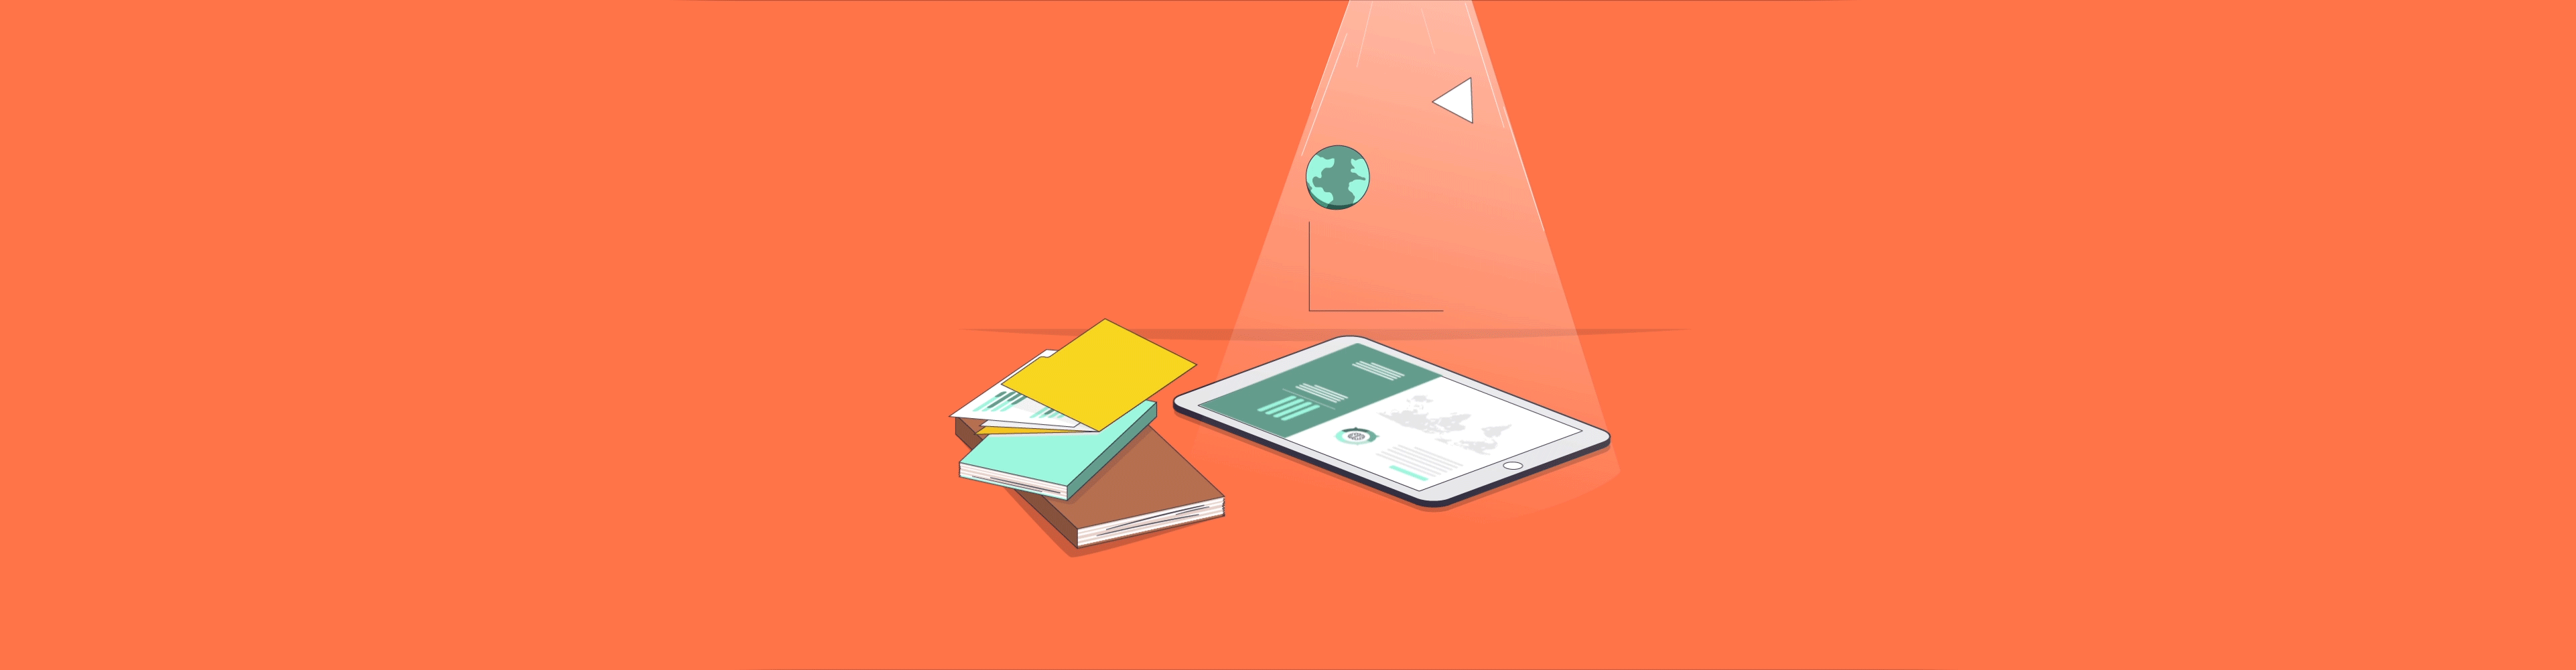

In [19]:
final_data = pd.merge(
    final_data, quiz_grades, left_on="Email Address", right_index=True
)
final_data

Email Address  Section First Name Last Name  Homework 1  \
wxb12345  woody.barrera_jr@univ.edu        1      Woody   Barrera        55.0   
mxl12345   malaika.lambert@univ.edu        2    Malaika   Lambert        63.0   
txj12345       traci.joyce@univ.edu        1      Traci     Joyce         NaN   
jgf12345   john.g.2.flower@univ.edu        3      Gregg    Flower        69.0   
smj00936     stacy.johnson@univ.edu        2      Stacy   Johnson        74.0   
...                             ...      ...        ...       ...         ...   
pmj37756      paul.johnson@univ.edu        3       Paul   Johnson        73.0   
dsl24347      danielle.lee@univ.edu        3   Danielle       Lee        69.0   
nxe44872    nicole.edwards@univ.edu        3     Nicole   Edwards        62.0   
bxr62103      bailey.reyes@univ.edu        2     Bailey     Reyes        53.0   
jxw53347       joyce.walls@univ.edu        1      Joyce     Walls        59.0   

          Homework 1 - Max Points  Homework 2  Homework 2 - Max Points  \
wxb12345                       80          62                       80   
mxl12345                       80          57                       80   
txj12345                       80          77                       80   
jgf12345                       80          52                       80   
smj00936                       80          55                       80   
...                           ...         ...                      ...   
pmj37756                       80          50                       80   
dsl24347                       80          51                       80   
nxe44872                       80          76                       80   
bxr62103                       80          50                       80   
jxw53347                       80          77                       80   

          Homework 3  Homework 3 - Max Points  ...  Exam 2  \
wxb12345          73                       80  ...      62   
mxl12345          78                       80  ...      91   
txj12345          58                       80  ...      84   
jgf12345          64                       80  ...      83   
smj00936          60                       80  ...      80   
...              ...                      ...  ...     ...   
pmj37756          55                       80  ...      80   
dsl24347          70                       80  ...      70   
nxe44872          62                       80  ...      63   
bxr62103          55                       80  ...      72   
jxw53347          61                       80  ...      73   

          Exam 2 - Max Points  Exam 3  Exam 3 - Max Points  Unnamed: 42  \
wxb12345                  100      90                  100          NaN   
mxl12345                  100      93                  100          NaN   
txj12345                  100      64                  100          NaN   
jgf12345                  100      77                  100          NaN   
smj00936                  100      86                  100          NaN   
...                       ...     ...                  ...          ...   
pmj37756                  100      94                  100          NaN   
dsl24347                  100      90                  100          NaN   
nxe44872                  100      65                  100          NaN   
bxr62103                  100      71                  100          NaN   
jxw53347                  100      91                  100          NaN   

          Quiz 1  Quiz 2  Quiz 3  Quiz 4  Quiz 5  
wxb12345       4      10      11       7      10  
mxl12345       8      10      10      13       6  
txj12345       8       6      14       9       4  
jgf12345       8       8       8      13       5  
smj00936       6      14      11       7       7  
...          ...     ...     ...     ...     ...  
pmj37756      10      14       9      11      10  
dsl24347       7      14      10       5       7  
nxe44872      10      12       9      12      10  
bxr6

In [20]:
final_data.drop('Unnamed: 42',axis=1,inplace=True)
final_data = final_data.fillna(0)
final_data

Email Address  Section First Name Last Name  Homework 1  \
wxb12345  woody.barrera_jr@univ.edu        1      Woody   Barrera        55.0   
mxl12345   malaika.lambert@univ.edu        2    Malaika   Lambert        63.0   
txj12345       traci.joyce@univ.edu        1      Traci     Joyce         0.0   
jgf12345   john.g.2.flower@univ.edu        3      Gregg    Flower        69.0   
smj00936     stacy.johnson@univ.edu        2      Stacy   Johnson        74.0   
...                             ...      ...        ...       ...         ...   
pmj37756      paul.johnson@univ.edu        3       Paul   Johnson        73.0   
dsl24347      danielle.lee@univ.edu        3   Danielle       Lee        69.0   
nxe44872    nicole.edwards@univ.edu        3     Nicole   Edwards        62.0   
bxr62103      bailey.reyes@univ.edu        2     Bailey     Reyes        53.0   
jxw53347       joyce.walls@univ.edu        1      Joyce     Walls        59.0   

          Homework 1 - Max Points  Homework 2  Homework 2 - Max Points  \
wxb12345                       80          62                       80   
mxl12345                       80          57                       80   
txj12345                       80          77                       80   
jgf12345                       80          52                       80   
smj00936                       80          55                       80   
...                           ...         ...                      ...   
pmj37756                       80          50                       80   
dsl24347                       80          51                       80   
nxe44872                       80          76                       80   
bxr62103                       80          50                       80   
jxw53347                       80          77                       80   

          Homework 3  Homework 3 - Max Points  ...  Exam 1 - Max Points  \
wxb12345          73                       80  ...                  100   
mxl12345          78                       80  ...                  100   
txj12345          58                       80  ...                  100   
jgf12345          64                       80  ...                  100   
smj00936          60                       80  ...                  100   
...              ...                      ...  ...                  ...   
pmj37756          55                       80  ...                  100   
dsl24347          70                       80  ...                  100   
nxe44872          62                       80  ...                  100   
bxr62103          55                       80  ...                  100   
jxw53347          61                       80  ...                  100   

          Exam 2  Exam 2 - Max Points  Exam 3  Exam 3 - Max Points  Quiz 1  \
wxb12345      62                  100      90                  100       4   
mxl12345      91                  100      93                  100       8   
txj12345      84                  100      64                  100       8   
jgf12345      83                  100      77                  100       8   
smj00936      80                  100      86                  100       6   
...          ...                  ...     ...                  ...     ...   
pmj37756      80                  100      94                  100      10   
dsl24347      70                  100      90                  100       7   
nxe44872      63                  100      65                  100      10   
bxr62103      72                  100      71                  100      10   
jxw53347      73                  100      91                  100      10   

          Quiz 2  Quiz 3  Quiz 4  Quiz 5  
wxb12345      10      11       7      10  
mxl12345      10      10      13       6  
txj12345       6      14       9       4  
jgf12345       8       8      13       5  
smj00936      14      11       7       7  
...          ...     ...     ...     ...  
pmj37756      14     

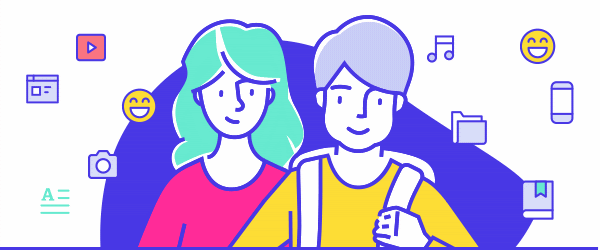

In [21]:
final_data['Email Address'].nunique()

150

In [22]:
by_comp = final_data.groupby("Section")

In [23]:
by_comp.mean()

Homework 1  Homework 1 - Max Points  Homework 2  \
Section                                                    
1         61.125000                     80.0   64.892857   
2         60.784314                     80.0   64.039216   
3         64.651163                     80.0   64.627907   

         Homework 2 - Max Points  Homework 3  Homework 3 - Max Points  \
Section                                                                 
1                           80.0   60.857143                     80.0   
2                           80.0   65.019608                     80.0   
3                           80.0   64.000000                     80.0   

         Homework 4  Homework 4 - Max Points  Homework 5  \
Section                                                    
1         78.875000                    100.0   56.642857   
2         79.529412                    100.0   54.372549   
3         77.441860                    100.0   54.837209   

         Homework 5 - Max Points  ...  Exam 1 - Max Points     Exam 2  \
Section                           ...                                   
1                           70.0  ...                100.0  78.464286   
2                           70.0  ...                100.0  82.058824   
3                           70.0  ...                100.0  81.627907   

         Exam 2 - Max Points     Exam 3  Exam 3 - Max Points    Quiz 1  \
Section                                                                  
1                      100.0  78.964286                100.0  7.500000   
2                      100.0  82.686275                100.0  7.176471   
3                      100.0  83.348837                100.0  7.581395   

            Quiz 2     Quiz 3     Quiz 4    Quiz 5  
Section                                             
1        10.410714  12.428571   8.946429  8.303571  
2        11.392157  10.960784   9.470588  7.784314  
3        10.906977  11.418605  10.279070  7.348837  

[3 rows x 31 columns]

In [24]:
# Homework
#1. Collect the columns with homework data.
homework_scores = final_data.filter(regex=r"^Homework \d\d?$", axis=1)
homework_max_points = final_data.filter(regex=r"^Homework \d\d? -", axis=1)
#a regular expression (regex) to filter final_data. If a column name doesn’t 
# match the regex, then the column won’t be included in the resulting DataFrame.


#2. Compute the total score.
sum_of_hw_scores = homework_scores.sum(axis=1)
sum_of_hw_max = homework_max_points.sum(axis=1)
final_data["Total Homework"] = sum_of_hw_scores / sum_of_hw_max

#3. Compute the average score.
hw_max_renamed = homework_max_points.set_axis(homework_scores.columns, axis=1)
average_hw_scores = (homework_scores / hw_max_renamed).sum(axis=1)
final_data["Average Homework"] = average_hw_scores / homework_scores.shape[1]

#4. Determine which score is larger and will be used in the final score calculation.
final_data["Homework Score"] = final_data[["Total Homework", "Average Homework"]].max(axis=1)

final_data

Email Address  Section First Name Last Name  Homework 1  \
wxb12345  woody.barrera_jr@univ.edu        1      Woody   Barrera        55.0   
mxl12345   malaika.lambert@univ.edu        2    Malaika   Lambert        63.0   
txj12345       traci.joyce@univ.edu        1      Traci     Joyce         0.0   
jgf12345   john.g.2.flower@univ.edu        3      Gregg    Flower        69.0   
smj00936     stacy.johnson@univ.edu        2      Stacy   Johnson        74.0   
...                             ...      ...        ...       ...         ...   
pmj37756      paul.johnson@univ.edu        3       Paul   Johnson        73.0   
dsl24347      danielle.lee@univ.edu        3   Danielle       Lee        69.0   
nxe44872    nicole.edwards@univ.edu        3     Nicole   Edwards        62.0   
bxr62103      bailey.reyes@univ.edu        2     Bailey     Reyes        53.0   
jxw53347       joyce.walls@univ.edu        1      Joyce     Walls        59.0   

          Homework 1 - Max Points  Homework 2  Homework 2 - Max Points  \
wxb12345                       80          62                       80   
mxl12345                       80          57                       80   
txj12345                       80          77                       80   
jgf12345                       80          52                       80   
smj00936                       80          55                       80   
...                           ...         ...                      ...   
pmj37756                       80          50                       80   
dsl24347                       80          51                       80   
nxe44872                       80          76                       80   
bxr62103                       80          50                       80   
jxw53347                       80          77                       80   

          Homework 3  Homework 3 - Max Points  ...  Exam 3  \
wxb12345          73                       80  ...      90   
mxl12345          78                       80  ...      93   
txj12345          58                       80  ...      64   
jgf12345          64                       80  ...      77   
smj00936          60                       80  ...      86   
...              ...                      ...  ...     ...   
pmj37756          55                       80  ...      94   
dsl24347          70                       80  ...      90   
nxe44872          62                       80  ...      65   
bxr62103          55                       80  ...      71   
jxw53347          61                       80  ...      91   

          Exam 3 - Max Points  Quiz 1  Quiz 2  Quiz 3  Quiz 4  Quiz 5  \
wxb12345                  100       4      10      11       7      10   
mxl12345                  100       8      10      10      13       6   
txj12345                  100       8       6      14       9       4   
jgf12345                  100       8       8       8      13       5   
smj00936                  100       6      14      11       7       7   
...                       ...     ...     ...     ...     ...     ...   
pmj37756                  100      10      14       9      11      10   
dsl24347                  100       7      14      10       5       7   
nxe44872                  100      10      12       9      12      10   
bxr62103                  100      10      15      17       6       7   
jxw53347                  100      10       6       9       7      12   

          Total Homework  Average Homework  Homework Score  
wxb12345        0.808108          0.799405        0.808108  
mxl12345        0.827027          0.818944        0.827027  
txj12345        0.785135          0.785940        0.785940  
jgf12345        0.770270          0.765710        0.770270  
smj00936        0.782432          0.787742        0.787742  
...                  ...               ...             ...  
pmj37756        0.735135          0.733325        0.735135  
dsl24347        0.822973          0.816865        

In [25]:
# Quizes
#1. Collect the columns with homework data.
quiz_scores = final_data.filter(regex=r"^Quiz \d$", axis=1)
quiz_max_points = pd.Series({"Quiz 1": 11, "Quiz 2": 15, "Quiz 3": 17, "Quiz 4": 14, "Quiz 5": 12})
# created a pandas Series for quiz_max_points using a dictionary as input

#2. Compute the total score.
sum_of_quiz_scores = quiz_scores.sum(axis=1)
sum_of_quiz_max = quiz_max_points.sum()
final_data["Total Quizzes"] = sum_of_quiz_scores / sum_of_quiz_max

#3. Compute the average score.
average_quiz_scores = (quiz_scores / quiz_max_points).sum(axis=1)
final_data["Average Quizzes"] = average_quiz_scores / quiz_scores.shape[1]

#4. Determine which score is larger and will be used in the final score calculation.
final_data["Quiz Score"] = final_data[ ["Total Quizzes", "Average Quizzes"]].max(axis=1)

final_data

Email Address  Section First Name Last Name  Homework 1  \
wxb12345  woody.barrera_jr@univ.edu        1      Woody   Barrera        55.0   
mxl12345   malaika.lambert@univ.edu        2    Malaika   Lambert        63.0   
txj12345       traci.joyce@univ.edu        1      Traci     Joyce         0.0   
jgf12345   john.g.2.flower@univ.edu        3      Gregg    Flower        69.0   
smj00936     stacy.johnson@univ.edu        2      Stacy   Johnson        74.0   
...                             ...      ...        ...       ...         ...   
pmj37756      paul.johnson@univ.edu        3       Paul   Johnson        73.0   
dsl24347      danielle.lee@univ.edu        3   Danielle       Lee        69.0   
nxe44872    nicole.edwards@univ.edu        3     Nicole   Edwards        62.0   
bxr62103      bailey.reyes@univ.edu        2     Bailey     Reyes        53.0   
jxw53347       joyce.walls@univ.edu        1      Joyce     Walls        59.0   

          Homework 1 - Max Points  Homework 2  Homework 2 - Max Points  \
wxb12345                       80          62                       80   
mxl12345                       80          57                       80   
txj12345                       80          77                       80   
jgf12345                       80          52                       80   
smj00936                       80          55                       80   
...                           ...         ...                      ...   
pmj37756                       80          50                       80   
dsl24347                       80          51                       80   
nxe44872                       80          76                       80   
bxr62103                       80          50                       80   
jxw53347                       80          77                       80   

          Homework 3  Homework 3 - Max Points  ...  Quiz 2  Quiz 3  Quiz 4  \
wxb12345          73                       80  ...      10      11       7   
mxl12345          78                       80  ...      10      10      13   
txj12345          58                       80  ...       6      14       9   
jgf12345          64                       80  ...       8       8      13   
smj00936          60                       80  ...      14      11       7   
...              ...                      ...  ...     ...     ...     ...   
pmj37756          55                       80  ...      14       9      11   
dsl24347          70                       80  ...      14      10       5   
nxe44872          62                       80  ...      12       9      12   
bxr62103          55                       80  ...      15      17       6   
jxw53347          61                       80  ...       6       9       7   

          Quiz 5  Total Homework  Average Homework  Homework Score  \
wxb12345      10        0.808108          0.799405        0.808108   
mxl12345       6        0.827027          0.818944        0.827027   
txj12345       4        0.785135          0.785940        0.785940   
jgf12345       5        0.770270          0.765710        0.770270   
smj00936       7        0.782432          0.787742        0.787742   
...          ...             ...               ...             ...   
pmj37756      10        0.735135          0.733325        0.735135   
dsl24347       7        0.822973          0.816865        0.822973   
nxe44872      10        0.839189          0.841175        0.841175   
bxr62103       7        0.779730          0.773690        0.779730   
jxw53347      12        0.751351          0.745171        0.751351   

          Total Quizzes  Average Quizzes  Quiz Score  
wxb12345       0.608696         0.602139    0.608696  
mxl12345       0.681159         0.682149    0.682149  
txj12345       0.594203         0.585399    0.594203  
jgf12345       0.608696         0.615286    0.615286  
smj00936       0.652174         0.641836    0.652174  
...                 ...              ...         ...

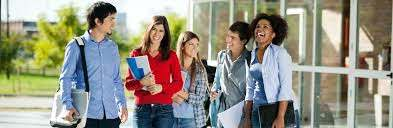

In [26]:
# Exams
n_exams = 3
for n in range(1, n_exams + 1):
    final_data[f"Exam {n} Score"] = (
        final_data[f"Exam {n}"] / final_data[f"Exam {n} - Max Points"]
    )
final_data

Email Address  Section First Name Last Name  Homework 1  \
wxb12345  woody.barrera_jr@univ.edu        1      Woody   Barrera        55.0   
mxl12345   malaika.lambert@univ.edu        2    Malaika   Lambert        63.0   
txj12345       traci.joyce@univ.edu        1      Traci     Joyce         0.0   
jgf12345   john.g.2.flower@univ.edu        3      Gregg    Flower        69.0   
smj00936     stacy.johnson@univ.edu        2      Stacy   Johnson        74.0   
...                             ...      ...        ...       ...         ...   
pmj37756      paul.johnson@univ.edu        3       Paul   Johnson        73.0   
dsl24347      danielle.lee@univ.edu        3   Danielle       Lee        69.0   
nxe44872    nicole.edwards@univ.edu        3     Nicole   Edwards        62.0   
bxr62103      bailey.reyes@univ.edu        2     Bailey     Reyes        53.0   
jxw53347       joyce.walls@univ.edu        1      Joyce     Walls        59.0   

          Homework 1 - Max Points  Homework 2  Homework 2 - Max Points  \
wxb12345                       80          62                       80   
mxl12345                       80          57                       80   
txj12345                       80          77                       80   
jgf12345                       80          52                       80   
smj00936                       80          55                       80   
...                           ...         ...                      ...   
pmj37756                       80          50                       80   
dsl24347                       80          51                       80   
nxe44872                       80          76                       80   
bxr62103                       80          50                       80   
jxw53347                       80          77                       80   

          Homework 3  Homework 3 - Max Points  ...  Quiz 5  Total Homework  \
wxb12345          73                       80  ...      10        0.808108   
mxl12345          78                       80  ...       6        0.827027   
txj12345          58                       80  ...       4        0.785135   
jgf12345          64                       80  ...       5        0.770270   
smj00936          60                       80  ...       7        0.782432   
...              ...                      ...  ...     ...             ...   
pmj37756          55                       80  ...      10        0.735135   
dsl24347          70                       80  ...       7        0.822973   
nxe44872          62                       80  ...      10        0.839189   
bxr62103          55                       80  ...       7        0.779730   
jxw53347          61                       80  ...      12        0.751351   

          Average Homework  Homework Score  Total Quizzes  Average Quizzes  \
wxb12345          0.799405        0.808108       0.608696         0.602139   
mxl12345          0.818944        0.827027       0.681159         0.682149   
txj12345          0.785940        0.785940       0.594203         0.585399   
jgf12345          0.765710        0.770270       0.608696         0.615286   
smj00936          0.787742        0.787742       0.652174         0.641836   
...                    ...             ...            ...              ...   
pmj37756          0.733325        0.735135       0.782609         0.798177   
dsl24347          0.816865        0.822973       0.623188         0.619682   
nxe44872          0.841175        0.841175       0.768116         0.785796   
bxr62103          0.773690        0.779730       0.797101         0.784199   
jxw53347          0.745171        0.751351       0.637681         0.667701   

          Quiz Score  Exam 1 Score  Exam 2 Score  Exam 3 Score  
wxb12345    0.608696          0.86          0.62          0.90  
mxl12345    0.682149          0.60          0.91          0.93  
txj12345    0.594203          1.00          0.84          0.64  
jgf12345    0.615286      

In [27]:
by_comp.max()

Email Address First Name  Last Name  Homework 1  \
Section                                                                
1        woody.barrera_jr@univ.edu      Woody      Young        80.0   
2          william.daniel@univ.edu    William    Woodard        80.0   
3            troy.raymond@univ.edu       Troy  Wilkerson        80.0   

         Homework 1 - Max Points  Homework 2  Homework 2 - Max Points  \
Section                                                                 
1                             80          80                       80   
2                             80          80                       80   
3                             80          80                       80   

         Homework 3  Homework 3 - Max Points  Homework 4  ...  \
Section                                                   ...   
1                80                       80          98  ...   
2                80                       80         100  ...   
3                79                       80         100  ...   

         Exam 1 - Max Points  Exam 2  Exam 2 - Max Points  Exam 3  \
Section                                                             
1                        100      99                  100      99   
2                        100     100                  100     100   
3                        100     100                  100     100   

         Exam 3 - Max Points  Quiz 1  Quiz 2  Quiz 3  Quiz 4  Quiz 5  
Section                                                               
1                        100      11      15      17      14      12  
2                        100      11      15      17      14      12  
3                        100      11      15      17      14      12  

[3 rows x 34 columns]

In [28]:
newdf = final_data[(final_data['Exam 1']>85) & (final_data['Exam 2']>85) & (final_data['Exam 3']>85)]

In [29]:
newdf

Email Address  Section First Name  Last Name  \
alw07647         amy.white@univ.edu        3        Amy      White   
jlh15029       john.harris@univ.edu        1       John     Harris   
tgl37922        tammy.leon@univ.edu        3      Tammy       Leon   
cxr98775       carol.reyes@univ.edu        3      Carol      Reyes   
njp08545  nicole.patterson@univ.edu        3     Nicole  Patterson   
axd67070          amy.dunn@univ.edu        3        Amy       Dunn   

          Homework 1  Homework 1 - Max Points  Homework 2  \
alw07647        71.0                       80          60   
jlh15029        74.0                       80          77   
tgl37922        63.0                       80          75   
cxr98775        75.0                       80          80   
njp08545        66.0                       80          66   
axd67070        72.0                       80          61   

          Homework 2 - Max Points  Homework 3  Homework 3 - Max Points  ...  \
alw07647                       80          72                       80  ...   
jlh15029                       80          53                       80  ...   
tgl37922                       80          63                       80  ...   
cxr98775                       80          66                       80  ...   
njp08545                       80          55                       80  ...   
axd67070                       80          50                       80  ...   

          Quiz 5  Total Homework  Average Homework  Homework Score  \
alw07647       4        0.837838          0.824940        0.837838   
jlh15029      12        0.862162          0.859667        0.862162   
tgl37922       4        0.809459          0.802250        0.809459   
cxr98775       6        0.818919          0.822488        0.822488   
njp08545      10        0.817568          0.815258        0.817568   
axd67070       6        0.786486          0.785226        0.786486   

          Total Quizzes  Average Quizzes  Quiz Score  Exam 1 Score  \
alw07647       0.739130         0.714220    0.739130          0.99   
jlh15029       0.768116         0.777194    0.777194          0.91   
tgl37922       0.652174         0.611775    0.652174          0.88   
cxr98775       0.695652         0.685027    0.695652          0.99   
njp08545       0.768116         0.765786    0.768116          0.96   
axd67070       0.681159         0.698121    0.698121          0.93   

          Exam 2 Score  Exam 3 Score  
alw07647          0.95          0.99  
jlh15029          0.90          0.95  
tgl37922          0.90          0.87  
cxr98775          0.91          0.90  
njp08545          0.91          0.95  
axd67070          0.96          0.86  

[6 rows x 44 columns]

In [30]:
weightings = pd.Series(
    {   "Exam 1 Score": 0.05,
        "Exam 2 Score": 0.1,
        "Exam 3 Score": 0.15,
        "Quiz Score": 0.30,
        "Homework Score": 0.4,})#weightage for each test

final_data["Final Score"] = (final_data[weightings.index] * weightings).sum(axis=1)
final_data["Final Percentage"] = np.ceil(final_data["Final Score"] * 100)


final_data

Email Address  Section First Name Last Name  Homework 1  \
wxb12345  woody.barrera_jr@univ.edu        1      Woody   Barrera        55.0   
mxl12345   malaika.lambert@univ.edu        2    Malaika   Lambert        63.0   
txj12345       traci.joyce@univ.edu        1      Traci     Joyce         0.0   
jgf12345   john.g.2.flower@univ.edu        3      Gregg    Flower        69.0   
smj00936     stacy.johnson@univ.edu        2      Stacy   Johnson        74.0   
...                             ...      ...        ...       ...         ...   
pmj37756      paul.johnson@univ.edu        3       Paul   Johnson        73.0   
dsl24347      danielle.lee@univ.edu        3   Danielle       Lee        69.0   
nxe44872    nicole.edwards@univ.edu        3     Nicole   Edwards        62.0   
bxr62103      bailey.reyes@univ.edu        2     Bailey     Reyes        53.0   
jxw53347       joyce.walls@univ.edu        1      Joyce     Walls        59.0   

          Homework 1 - Max Points  Homework 2  Homework 2 - Max Points  \
wxb12345                       80          62                       80   
mxl12345                       80          57                       80   
txj12345                       80          77                       80   
jgf12345                       80          52                       80   
smj00936                       80          55                       80   
...                           ...         ...                      ...   
pmj37756                       80          50                       80   
dsl24347                       80          51                       80   
nxe44872                       80          76                       80   
bxr62103                       80          50                       80   
jxw53347                       80          77                       80   

          Homework 3  Homework 3 - Max Points  ...  Average Homework  \
wxb12345          73                       80  ...          0.799405   
mxl12345          78                       80  ...          0.818944   
txj12345          58                       80  ...          0.785940   
jgf12345          64                       80  ...          0.765710   
smj00936          60                       80  ...          0.787742   
...              ...                      ...  ...               ...   
pmj37756          55                       80  ...          0.733325   
dsl24347          70                       80  ...          0.816865   
nxe44872          62                       80  ...          0.841175   
bxr62103          55                       80  ...          0.773690   
jxw53347          61                       80  ...          0.745171   

          Homework Score  Total Quizzes  Average Quizzes  Quiz Score  \
wxb12345        0.808108       0.608696         0.602139    0.608696   
mxl12345        0.827027       0.681159         0.682149    0.682149   
txj12345        0.785940       0.594203         0.585399    0.594203   
jgf12345        0.770270       0.608696         0.615286    0.615286   
smj00936        0.787742       0.652174         0.641836    0.652174   
...                  ...            ...              ...         ...   
pmj37756        0.735135       0.782609         0.798177    0.798177   
dsl24347        0.822973       0.623188         0.619682    0.623188   
nxe44872        0.841175       0.768116         0.785796    0.785796   
bxr62103        0.779730       0.797101         0.784199    0.797101   
jxw53347        0.751351       0.637681         0.667701    0.667701   

          Exam 1 Score  Exam 2 Score  Exam 3 Score  Final Score  \
wxb12345          0.86          0.62          0.90     0.745852   
mxl12345          0.60          0.91          0.93     0.795956   
txj12345          1.00          0.84          0.64     0.722637   
jgf12345          0.72          0.83          0.77     0.727194   
smj00936          0.96          0.80          0.86     0.767749   
...                ...      

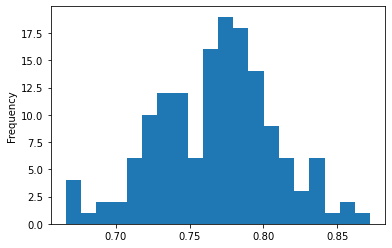

In [31]:
final_data["Final Score"].plot.hist(bins=20, label="Histogram")

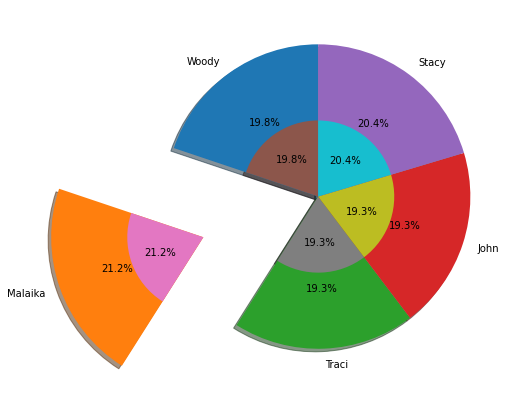

In [60]:
Pert=[75,80,73,73,77]
name=['Woody','Malaika','Traci','John','Stacy']
explode=0,0.8,0,0,0
fig = plt.figure(figsize =(10, 7)) 
plt.pie(Pert ,explode=explode, labels = name,autopct='%0.1F%%',shadow=True,startangle=90,radius=1) 
plt.pie(Pert ,explode=explode, autopct='%0.1F%%',shadow=True,startangle=90,radius=0.5) 
plt.show()

# Thank You 

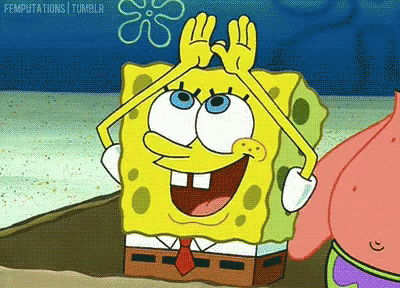